In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_excel(r'D:\Project\New folder (2)\AIP391_Group1_StreetFood\AIP391_Group1_StreetFood\Data\mean_data.xlsx')
print(df)

     Unnamed: 0     video id  Question 2: Sound (1-5)  \
0             0  mSg4AmqvT0I                        4   
1             1  Lol8sqRfQYE                        3   
2             2  kwwGvRUyIG8                        4   
3             3  52alUCchcBw                        2   
4             4  iDCC0SEHDY8                        3   
..          ...          ...                      ...   
130         130  Yr9Z19ZWMfg                        4   
131         131  umhYUSmtkIw                        3   
132         132  7JsskyOhp0I                        4   
133         133  usrgPQ74WVA                        3   
134         134  eZCiJihCPUE                        5   

     Question 2.1: Music (1-5)  Question 2.2 : Noise control (1-5)  \
0                            4                                   3   
1                            3                                   1   
2                            4                                   2   
3                            2     

<AxesSubplot: xlabel='Attractive Level (1-5)', ylabel='Count'>

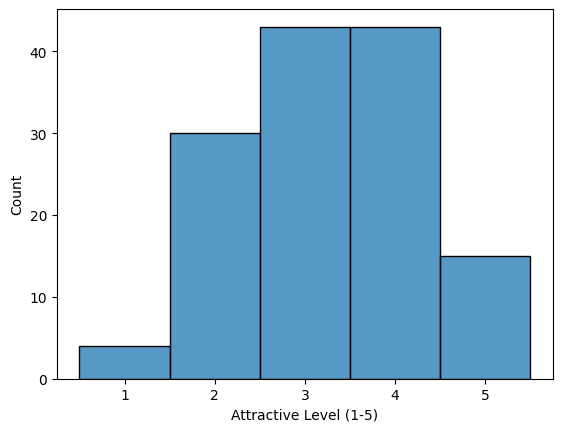

In [3]:
sns.histplot(df['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [4]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [15]:
oversample = SMOTE(k_neighbors=2, random_state=0)
X, y = oversample.fit_resample(df[core_columns][:], df[output_column][:])
# \X, y = pf[core_columns][:], pf[output_column][:]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[columns][:], df[output_column][:], test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
print('Linear Regression:')
result = clf.predict(X_train).round()


print('train accuracy: ', f1_score(result, y_train, average='macro'))

result = clf.predict(X_test).round()

print('test accuracy: ', f1_score(result, y_test, average='macro'))

In [18]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(500))
clf.fit(X_train, y_train)
print('Multilayer Perceptron:')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

Multilayer Perceptron:
train accuracy:  0.9047490765231714
test accuracy:  0.7805555555555556


In [ ]:
df['Attractive Level (1-5)'] = df['Attractive Level (1-5)'].replace([1,2],0)
df['Attractive Level (1-5)'] = df['Attractive Level (1-5)'].replace([3,4,5],1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[columns][:], df[output_column][:], test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
print('Logistic Regression:')

print('train accuracy: ',f1_score(logreg.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(logreg.predict(X_test), y_test, average='macro'))

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
X = df['Question 6: Reviewer (1-5)'].to_numpy().reshape(-1, 1)

In [20]:

center1 = []
center2 = []
center3 = []
cout_center1 = 0
cout_center2 = 0
cout_center3 = 0
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

pred_label = kmeans.predict(X)



for i in range(len(pred_label)):
    if pred_label[i] == 0:
        cout_center1 += 1
        center1.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
    elif pred_label[i] == 1:
        cout_center2 += 1
        center2.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
    else:
        cout_center3 += 1
        center3.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
print("Center 1: %s"%(cout_center1))
for i in range(5):
    print(center1[i])
print("Center 2: %s"%(cout_center2))
for i in range(5):
    print(center2[i])
print("Center 3: %s"%(cout_center3))
for i in range(5):
    print(center3[i])



Center 1: 57
2 kwwGvRUyIG8 4
5 QXGyszq4pic 3
8 mfXlFpnduoA 4
10 TFGgOwCBP3g 4
12 Y6TRwhPSYz4 4
Center 2: 51
0 mSg4AmqvT0I 3
1 Lol8sqRfQYE 2
4 iDCC0SEHDY8 2
6 w8f4mRCLrdU 4
7 r1BzB2-Cx7k 3
Center 3: 27
3 52alUCchcBw 2
9 ncoqtS2FYW8 2
15 8yBn-c8__Tk 2
24 3qfTtx3yG5U 3
28 nruK2pDiAEA 3


In [21]:
X = df[columns][:]

In [22]:
center1 = []
center2 = []
center3 = []
cout_center1 = 0
cout_center2 = 0
cout_center3 = 0
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

pred_label = kmeans.predict(X)



for i in range(len(pred_label)):
    if pred_label[i] == 0:
        cout_center1 += 1
        center1.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
    elif pred_label[i] == 1:
        cout_center2 += 1
        center2.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
    else:
        cout_center3 += 1
        center3.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
print("Center 1: %s"%(cout_center1))
for i in range(5):
    print(center1[i])
print("Center 2: %s"%(cout_center2))
for i in range(5):
    print(center2[i])
print("Center 3: %s"%(cout_center3))
for i in range(5):
    print(center3[i])

Center 1: 35
0 mSg4AmqvT0I 3
10 TFGgOwCBP3g 4
12 Y6TRwhPSYz4 4
16 l5H6jl_g2XE 5
19 YrMdSvixbGk 4
Center 2: 39
3 52alUCchcBw 2
4 iDCC0SEHDY8 2
9 ncoqtS2FYW8 2
13 FqZqiSKpQVo 3
15 8yBn-c8__Tk 2
Center 3: 61
1 Lol8sqRfQYE 2
2 kwwGvRUyIG8 4
5 QXGyszq4pic 3
6 w8f4mRCLrdU 4
7 r1BzB2-Cx7k 3


In [30]:
center1 = []
center2 = []
cout_center1 = 0
cout_center2 = 0
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

pred_label = kmeans.predict(X)



for i in range(len(pred_label)):
    if pred_label[i] == 0:
        cout_center1 += 1
        center1.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
    elif pred_label[i] == 1:
        cout_center2 += 1
        center2.append("%s %s %s"%(i, str(df.loc[i,'video id']),str(df.loc[i,'Attractive Level (1-5)'])))
print("Center 1: %s"%(cout_center1))
for i in range(30):
    print(center1[i])
print("Center 2: %s"%(cout_center2))
for i in range(30):
    print(center2[i])

Center 1: 77
1 Lol8sqRfQYE 2
3 52alUCchcBw 2
4 iDCC0SEHDY8 2
5 QXGyszq4pic 3
7 r1BzB2-Cx7k 3
8 mfXlFpnduoA 4
9 ncoqtS2FYW8 2
13 FqZqiSKpQVo 3
15 8yBn-c8__Tk 2
20 DceuZyI6rHk 3
21 8-2XcUzHtIo 3
23 JG_LLt3QYbs 3
24 3qfTtx3yG5U 3
27 G9uP3B8nDzY 3
28 nruK2pDiAEA 3
29 EFbxgnqqblE 3
31 U3OwOM-4DaU 2
32 eZyK0ED21vI 2
33 A-3OFecUdqs 3
36 Ar53XryS4OQ 2
37 dEuQ2SqmxqA 2
38 ygmhxCyUfBk 2
40 TCTpiQLZxrI 3
42 z5j8rKWPCcU 3
44 IESQ3POtkx0 3
45 TfP3TSml0E4 2
46 tQ-sZLeix8w 2
47 gCVnzXm09Jo 3
49 T4lSN47hwA4 1
50 NgX99Cljm0c 4
Center 2: 58
0 mSg4AmqvT0I 3
2 kwwGvRUyIG8 4
6 w8f4mRCLrdU 4
10 TFGgOwCBP3g 4
11 rSTBg8w7F8I 3
12 Y6TRwhPSYz4 4
14 RhJ7Cp7_ojU 4
16 l5H6jl_g2XE 5
17 1iSLzc0hF6g 4
18 pxBL4T2Qpzw 4
19 YrMdSvixbGk 4
22 iljkdsw4JfA 5
25 fU6UZtcvlYM 3
26 GL3mfWvsF24 5
30 PUnKvRTvAjc 4
34 6x9TT-C2Ygs 4
35 TvnavJ5QJC4 4
39 RJyyho7bfkg 5
41 2mYcsM05lDk 5
43 Zvk06Y6E7Rk 3
48 je9PmQhyHDk 4
55 uK2-dN0UqLY 4
58 H4F0wPu0Bzg 4
60 j-USg2l-Akc 5
61 SA-Nq84Cmok 4
62 YVU73shWxH0 5
64 pCh4iq0kj3g 4
67 Ay8xR5JwgTE 